# Test del Módulo de Extracción de Datos

Este notebook prueba el módulo `data` que extrae información financiera usando yfinance.

In [1]:
import sys
from pathlib import Path

# Añadir src al path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

from src.data import (
    DataProvider,
    get_data,
    create_fundamental_tables,
    create_historical_tables
)
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from IPython.display import display

## 1. Inicialización del Proveedor

In [2]:
provider = DataProvider()
print(f"Cache directory: {provider.cache_dir}")

Cache directory: C:\Users\Pc\Sistema-De-Analisis-Financiero\data\raw


## 2. Obtener Datos de Precios

In [3]:
symbol = "AAPL"
price_data = provider.get_price_data(symbol, period="1y", interval="1d")

print(f"\nDatos de precios para {symbol}:")
print(f"Shape: {price_data.shape}")
print(f"\nColumnas: {list(price_data.columns)}")

# Mostrar tabla con datos de precios
print(f"\n--- Tabla de Datos de Precios (Últimos 10 días) ---")
display(price_data.tail(10).style.format({
    'Open': '{:.2f}',
    'High': '{:.2f}',
    'Low': '{:.2f}',
    'Close': '{:.2f}',
    'Volume': '{:,.0f}',
    'Dividends': '{:.2f}',
    'Stock splits': '{:.2f}'
}).background_gradient(subset=['Close'], cmap='RdYlGn'))

INFO:src.data.raw.data_yahoo_finance:Datos cargados desde cache: AAPL_price_1y_1d.pkl
INFO:src.data.raw.data_yahoo_finance:Usando datos de cache expirado para AAPL



Datos de precios para AAPL:
Shape: (251, 7)

Columnas: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock splits']

--- Tabla de Datos de Precios (Últimos 10 días) ---


,Open,High,Low,Close,Volume,Dividends,Stock splits
Date,,,,,,,
2025-12-30 00:00:00-05:00,272.81,274.08,272.28,273.08,"22,139,600",0.00,0.00
2025-12-31 00:00:00-05:00,273.06,273.68,271.75,271.86,"27,293,600",0.00,0.00
2026-01-02 00:00:00-05:00,272.26,277.84,269.00,271.01,"37,838,100",0.00,0.00
2026-01-05 00:00:00-05:00,270.64,271.51,266.14,267.26,"45,647,200",0.00,0.00
2026-01-06 00:00:00-05:00,267.00,267.55,262.12,262.36,"52,352,100",0.00,0.00
2026-01-07 00:00:00-05:00,263.20,263.68,259.81,260.33,"48,309,800",0.00,0.00
2026-01-08 00:00:00-05:00,257.02,259.29,255.70,259.04,"50,419,300",0.00,0.00
2026-01-09 00:00:00-05:00,259.08,260.21,256.22,259.37,"39,997,000",0.00,0.00
2026-01-12 00:00:00-05:00,259.16,261.30,256.80,260.25,"45,263,800",0.00,0.00


## 3. Visualización de Precios

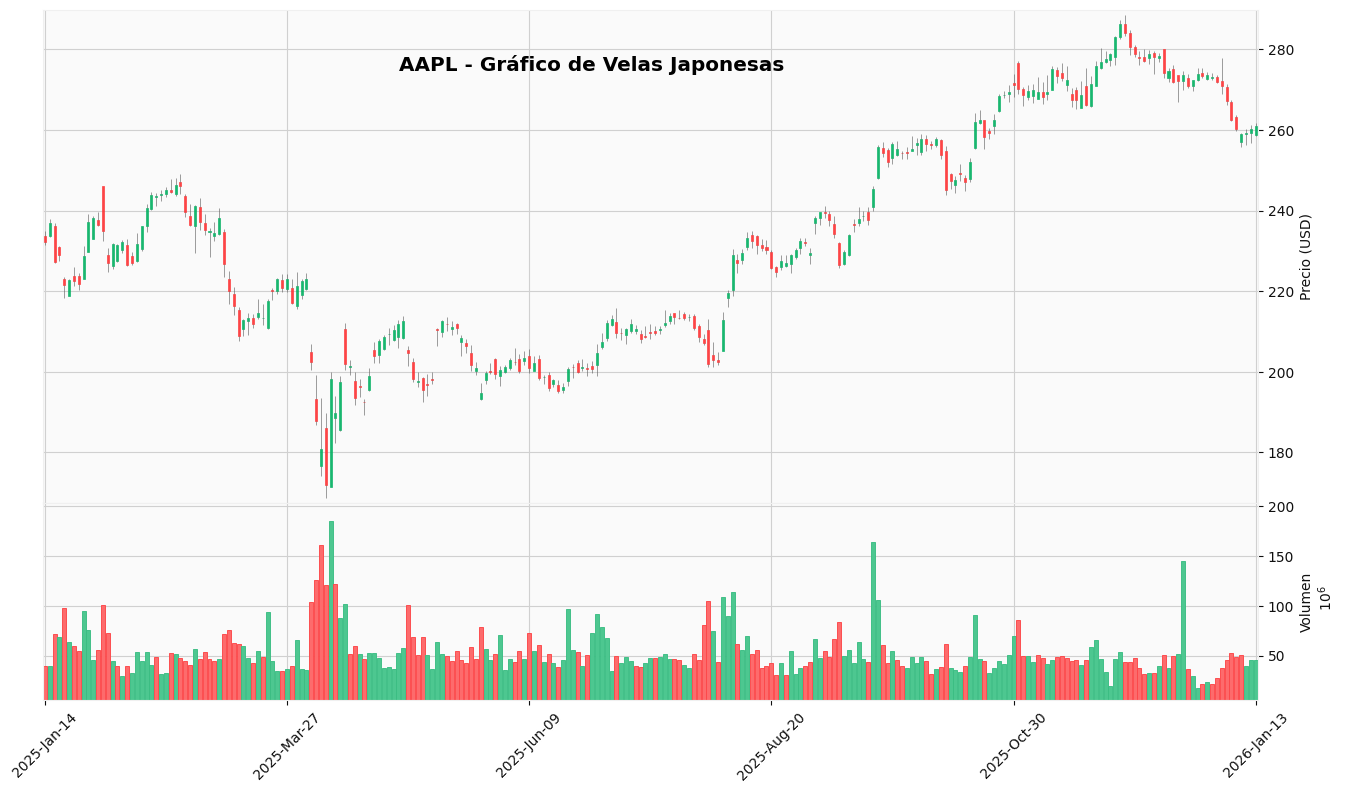

In [4]:
# Preparar datos para mplfinance
# mplfinance espera columnas en minúsculas y un índice datetime
ohlc_data = price_data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
ohlc_data.columns = ['open', 'high', 'low', 'close', 'volume']

# Crear gráfico de velas japonesas
mpf.plot(
    ohlc_data,
    type='candle',
    style='yahoo',
    volume=True,
    title=f'{symbol} - Gráfico de Velas Japonesas',
    ylabel='Precio (USD)',
    ylabel_lower='Volumen',
    figsize=(14, 8),
    show_nontrading=False,
    tight_layout=True,
    returnfig=False
)

## 4. Obtener Datos Fundamentales

In [5]:
fundamental = provider.get_fundamental_data(symbol)

# Crear tablas organizadas por categorías
print(f"\n{'='*60}")
print(f"DATOS FUNDAMENTALES - {fundamental.get('name', symbol)}")
print(f"{'='*60}\n")

tables = create_fundamental_tables(fundamental)

# Mostrar tablas con estilos
table_styles = {
    'general': {'bg_color': '#4472C4'},
    'valuation': {'bg_color': '#70AD47'},
    'profitability': {'bg_color': '#FFC000'},
    'growth': {'bg_color': '#7030A0'},
    'health': {'bg_color': '#C00000'},
    'prices': {'bg_color': '#0070C0'}
}

table_titles = {
    'general': '--- INFORMACIÓN GENERAL ---',
    'valuation': '--- VALORACIÓN ---',
    'profitability': '--- RENTABILIDAD ---',
    'growth': '--- CRECIMIENTO ---',
    'health': '--- SALUD FINANCIERA ---',
    'prices': '--- PRECIOS Y RECOMENDACIONES ---'
}

for table_key, df in tables.items():
    print(table_titles.get(table_key, ''))
    bg_color = table_styles.get(table_key, {}).get('bg_color', '#4472C4')
    display(df.style.set_table_styles([
        {'selector': 'th', 'props': [('background-color', bg_color), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('padding', '8px')]}
    ]).hide(axis='index'))

INFO:src.data.raw.data_yahoo_finance:Datos cargados desde cache: AAPL_fundamental.pkl
INFO:src.data.raw.data_yahoo_finance:Usando datos de cache expirado para fundamentales de AAPL



DATOS FUNDAMENTALES - Apple Inc.

--- INFORMACIÓN GENERAL ---


Métrica,Valor
Nombre,Apple Inc.
Sector,Technology
Industria,Consumer Electronics


--- VALORACIÓN ---


Métrica,Valor
Market Cap,"$3,857,366,646,784"
Enterprise Value,"$3,915,046,977,536"
PE Ratio,34.95
Forward PE,28.53
PEG Ratio,N/A
Price to Book,52.30
Price to Sales,9.27
Dividend Yield,40.00%
Payout Ratio,13.67%


--- RENTABILIDAD ---


Métrica,Valor
ROE (Return on Equity),171.42%
ROA (Return on Assets),22.96%
Profit Margin,26.92%
Operating Margin,31.65%


--- CRECIMIENTO ---


Métrica,Valor
Revenue Growth,7.90%
Earnings Growth,91.20%


--- SALUD FINANCIERA ---


Métrica,Valor
Debt to Equity,152.41
Current Ratio,0.89
Quick Ratio,0.77
Beta,1.09


--- PRECIOS Y RECOMENDACIONES ---


Métrica,Valor
Precio Actual,$261.05
52 Week High,$288.62
52 Week Low,$169.21
Target Price,$287.83
Recomendación,BUY
Número de Analistas,41


## 5. Evolución Histórica de Datos Fundamentales

In [6]:
# Obtener estados financieros históricos
income_statement = provider.get_financial_statements(symbol, "income", use_cache=True)
balance_sheet = provider.get_financial_statements(symbol, "balance", use_cache=True)
cashflow_statement = provider.get_financial_statements(symbol, "cashflow", use_cache=True)

print(f"\n{'='*60}")
print(f"EVOLUCIÓN HISTÓRICA - {fundamental.get('name', symbol)}")
print(f"{'='*60}\n")

# Crear tablas históricas
historical_tables = create_historical_tables(income_statement, balance_sheet, cashflow_statement, max_years=5)

# Mostrar tablas con estilos
historical_styles = {
    'income_history': {'bg_color': '#70AD47', 'title': '--- EVOLUCIÓN DE INGRESOS Y BENEFICIOS (Últimos 5 años) ---'},
    'balance_history': {'bg_color': '#4472C4', 'title': '--- EVOLUCIÓN DEL BALANCE GENERAL (Últimos 5 años) ---'},
    'cashflow_history': {'bg_color': '#FFC000', 'title': '--- EVOLUCIÓN DEL FLUJO DE EFECTIVO (Últimos 5 años) ---'},
    'ratios_history': {'bg_color': '#7030A0', 'title': '--- EVOLUCIÓN DE RATIOS CLAVE (Últimos 5 años) ---'}
}

for table_key, df in historical_tables.items():
    style_config = historical_styles.get(table_key, {'bg_color': '#4472C4', 'title': ''})
    print(style_config['title'])
    display(df.style.set_table_styles([
        {'selector': 'th', 'props': [('background-color', style_config['bg_color']), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('padding', '8px'), ('text-align', 'right')]}
    ]))

INFO:src.data.raw.data_yahoo_finance:Datos cargados desde cache: AAPL_statement_income.pkl
INFO:src.data.raw.data_yahoo_finance:Datos cargados desde cache: AAPL_statement_balance.pkl
INFO:src.data.raw.data_yahoo_finance:Datos cargados desde cache: AAPL_statement_cashflow.pkl



EVOLUCIÓN HISTÓRICA - Apple Inc.

--- EVOLUCIÓN DE INGRESOS Y BENEFICIOS (Últimos 5 años) ---


,Total Revenue,Cost of Revenue,Gross Profit,Operating Income,Net Income,EBITDA
2025,$416.16B,$220.96B,$195.20B,$133.05B,$112.01B,$144.75B
2024,$391.04B,$210.35B,$180.68B,$123.22B,$93.74B,$134.66B
2023,$383.29B,$214.14B,$169.15B,$114.30B,$97.00B,$125.82B
2022,$394.33B,$223.55B,$170.78B,$119.44B,$99.80B,$130.54B
2021,N/A,N/A,N/A,N/A,N/A,N/A


--- EVOLUCIÓN DEL BALANCE GENERAL (Últimos 5 años) ---


,Total Assets,Total Stockholder Equity,Cash And Cash Equivalents,Total Debt,Current Assets,Current Liabilities
2025,$359.24B,$73.73B,$35.93B,$98.66B,$147.96B,$165.63B
2024,$364.98B,$56.95B,$29.94B,$106.63B,$152.99B,$176.39B
2023,$352.58B,$62.15B,$29.96B,$111.09B,$143.57B,$145.31B
2022,$352.75B,$50.67B,$23.65B,$132.48B,$135.41B,$153.98B
2021,N/A,N/A,N/A,N/A,N/A,N/A


--- EVOLUCIÓN DE RATIOS CLAVE (Últimos 5 años) ---


,Profit Margin (%),ROA (%),ROE (%),Debt/Equity
2025,26.92%,31.18%,151.91%,1.34
2024,23.97%,25.68%,164.59%,1.87
2023,25.31%,27.51%,156.08%,1.79
2022,25.31%,28.29%,196.96%,2.61
2021,nan%,nan%,nan%,nan
